In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

(750, 500)

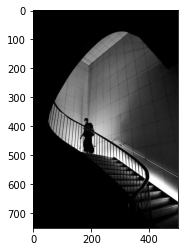

In [18]:
img = cv2.imread('stairs.webp', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
img.shape

In [19]:
alto = img.shape[0]
ancho = img.shape[1]

ecualizeImg = np.zeros((alto, ancho), dtype=np.uint8)
intensidades = range(0, 256)
frecuencia = np.zeros(256, dtype=np.uint8)
ecualizeImg.shape

(750, 500)

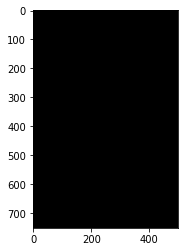

In [11]:
plt.imshow(ecualizeImg, cmap='gray')

In [13]:
for i in range(0, alto):
    for j in range(0, ancho):
        frecuencia[img[i, j]] += 1
frecuencia

array([132, 130, 114,  96,   0, 166, 178,  70,  28, 158, 242,   0, 216,
       212, 126, 238, 144,  78,   0, 172,  58,  98,  74,  62, 136,   0,
       126, 220, 152, 200,  88, 176,   0,  54,  56, 240, 130, 100,  28,
         0, 114, 116, 198,  62, 216,  72,   0, 166, 230,  84,  76,   4,
        40,   0, 152, 136,  22, 252, 160, 170,   0, 150, 156,  86, 156,
         6,  60,   0,  46,  38,  66, 198, 180,  80,   0, 204, 150, 222,
       194,  42, 232,  94,   0, 240, 198,  64, 212, 190,  14,   0, 166,
       144,  88, 122,  14, 174,   0, 112, 104, 210, 206,  14, 198,   0,
        44, 144,  74, 194, 250,   8,   0, 160, 234,  50, 146,  62,  24,
         0, 246,  26, 236, 146,  48, 226,   0, 126, 218, 132, 200,  26,
       162,   0, 102,  50,  24, 164, 182, 126,   0,  36, 230, 248, 168,
        26,  18,   0, 240,   4, 110,  76, 106, 148,   0, 168, 112, 148,
       134, 226,  30,   0, 172,   6,  42, 110,  28,  30,  54,   0, 198,
       134, 128,  32,  88,  76,   0,  76, 114, 246,  46, 248,  7

In [15]:
densidad = np.true_divide(frecuencia, alto * ancho)
densidad

array([3.52000000e-04, 3.46666667e-04, 3.04000000e-04, 2.56000000e-04,
       0.00000000e+00, 4.42666667e-04, 4.74666667e-04, 1.86666667e-04,
       7.46666667e-05, 4.21333333e-04, 6.45333333e-04, 0.00000000e+00,
       5.76000000e-04, 5.65333333e-04, 3.36000000e-04, 6.34666667e-04,
       3.84000000e-04, 2.08000000e-04, 0.00000000e+00, 4.58666667e-04,
       1.54666667e-04, 2.61333333e-04, 1.97333333e-04, 1.65333333e-04,
       3.62666667e-04, 0.00000000e+00, 3.36000000e-04, 5.86666667e-04,
       4.05333333e-04, 5.33333333e-04, 2.34666667e-04, 4.69333333e-04,
       0.00000000e+00, 1.44000000e-04, 1.49333333e-04, 6.40000000e-04,
       3.46666667e-04, 2.66666667e-04, 7.46666667e-05, 0.00000000e+00,
       3.04000000e-04, 3.09333333e-04, 5.28000000e-04, 1.65333333e-04,
       5.76000000e-04, 1.92000000e-04, 0.00000000e+00, 4.42666667e-04,
       6.13333333e-04, 2.24000000e-04, 2.02666667e-04, 1.06666667e-05,
       1.06666667e-04, 0.00000000e+00, 4.05333333e-04, 3.62666667e-04,
      

In [17]:
cdfDensidad = np.cumsum(densidad)
cdfDensidad

array([0.000352  , 0.00069867, 0.00100267, 0.00125867, 0.00125867,
       0.00170133, 0.002176  , 0.00236267, 0.00243733, 0.00285867,
       0.003504  , 0.003504  , 0.00408   , 0.00464533, 0.00498133,
       0.005616  , 0.006     , 0.006208  , 0.006208  , 0.00666667,
       0.00682133, 0.00708267, 0.00728   , 0.00744533, 0.007808  ,
       0.007808  , 0.008144  , 0.00873067, 0.009136  , 0.00966933,
       0.009904  , 0.01037333, 0.01037333, 0.01051733, 0.01066667,
       0.01130667, 0.01165333, 0.01192   , 0.01199467, 0.01199467,
       0.01229867, 0.012608  , 0.013136  , 0.01330133, 0.01387733,
       0.01406933, 0.01406933, 0.014512  , 0.01512533, 0.01534933,
       0.015552  , 0.01556267, 0.01566933, 0.01566933, 0.01607467,
       0.01643733, 0.016496  , 0.017168  , 0.01759467, 0.018048  ,
       0.018048  , 0.018448  , 0.018864  , 0.01909333, 0.01950933,
       0.01952533, 0.01968533, 0.01968533, 0.019808  , 0.01990933,
       0.02008533, 0.02061333, 0.02109333, 0.02130667, 0.02130

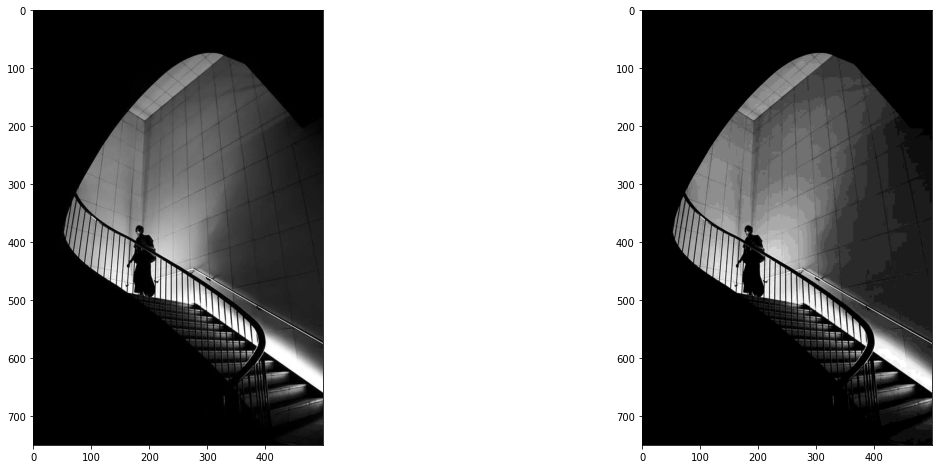

In [37]:
for i in range(0, alto):
    for j in range(0, ancho):
        ecualizeImg[i, j] = np.uint8(cdfDensidad[img[i, j]] * 255)

f, axarr = plt.subplots(1, 2, figsize=(20, 8))
axarr[0].imshow(img, cmap='gray')
axarr[1].imshow(ecualizeImg, cmap='gray' )

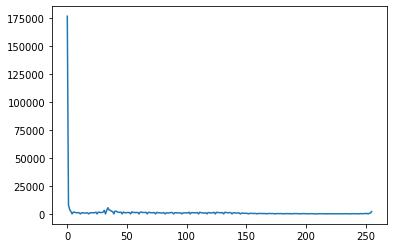

In [27]:
hist1 = cv2.calcHist([img], [0], None, [256], [0, 256])
plt.plot(hist1)

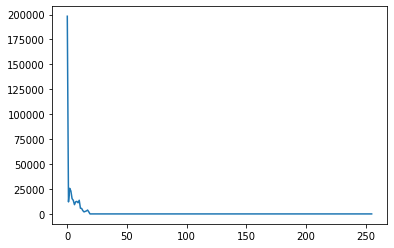

In [28]:
hist2 = cv2.calcHist([ecualizeImg], [0], None, [256], [0, 256])
plt.plot(hist2)